<h1>Text Sentiment Analysis for Twitter Posts</h1>

Objective:
- Find out the different sentiment levels (negative, neutral, positive) among the posts and generate word clouds to discover key motivations / beliefs driving the sentiments

In [1]:
# pip install vaderSentiment

In [2]:
# pip install boto3

In [3]:
# pip install seaborn --upgrade

In [4]:
import pandas as pd
import numpy as np
import os
import re
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jlrqq/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
analyser = SentimentIntensityAnalyzer()

In [6]:
# https://github.com/cjhutto/vaderSentiment#about-the-scoring
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [7]:
# Read Twitter Data from Local CSV

tweets = pd.read_csv('../Twitter_Data/Twitter_Jan_Mar_5000.csv', index_col=0)

print(tweets.shape)
tweets.head()

(1335, 5)


,Tweet Id,Text,Username,Coordinates,Place
Datetime,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN


In [8]:
# Read Twitter Data from S3 

# import pandas as pd
# import boto3
# import io

# AWS_ACCESS_KEY_ID = "*"
# AWS_SECRET_ACCESS_KEY = "*"
# bucket = "is434-last-sem-best-sem"
# file_name = "data-lake/tweeter_data.csv"

# # Create connection to S3 and all buckets within S3
# s3 = boto3.client(
#     's3',
#     aws_access_key_id=AWS_ACCESS_KEY_ID,
#     aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
# )

# # Get object and file (key) from bucket
# obj = s3.get_object(Bucket= bucket, Key= file_name) 

# tweets = pd.read_csv(io.BytesIO(obj['Body'].read()))
# tweets

In [9]:
# Extract Text from DataFrame into a List

tweet_text_list = tweets['Text'].tolist()
tweet_text_list

['Coronavirus: Washington state nursing home placed on lockdown\n#COVID19 #US\nhttps://t.co/zmGxKrZvEB',
 "@amybruni @JohnDePetroshow @NewportBuzz Someone I know had to rush a child to @HasbroChildrens and I'm hearing that they put the hospital on lockdown as there have been positive COVID19 tests, but nothing has made the news.",
 "@luispedrocoelho Here's how the #coronavirus situation looks like 1 week later:\n\ncould it be that Italy's 'earlier' lockdown prevented #COVID19 to further spread? If anyone is an expert on this I'd appreciate hearing your thoughts on this.\n\n#coronavirusitalia \n#covid19italy https://t.co/02LKAcyKkg",
 'Tourists staying at a Tenerife hotel that has been on lockdown after five cases of the #coronavirus were detected there are free to leave if they test negative for the virus: health authorities\n\n#Coronavid19 #COVID19\nhttps://t.co/zLXamrBS1P',
 "We don't have a clue.\nOnly thing we saw is China taking draconic measures, even welding in their own people,

In [10]:
# Clean Text Function

def clean_tweet(comments):

    test_sentences = sent_tokenize(comments)
    test_sentences

    tokenizer = RegexpTokenizer(r'\w+')
    test_words = tokenizer.tokenize(comments)
    test_words_lower = list(map(lambda x: x.lower(), test_words)) 

    stop_words = stopwords.words('english')
    # print(stop_words)
    stop_words2 = ['co', 'covid', 'covid19', 'coronavirus', 'lockdown', 'covid19 lockdown','&amp', 'amp']

    filtered_test_words = []

    for w in test_words_lower:
        if w not in stop_words and w not in stop_words2:
            filtered_test_words.append(w)

    porter_stemer = PorterStemmer()

    stemed_filter_test_words = []
    for i in filtered_test_words:
        stemed_filter_test_words.append(porter_stemer.stem(i))

    join_words = " ".join([x for x in stemed_filter_test_words])

    return join_words

In [11]:
# Extract processed text

processed_text = [clean_tweet(tw) for tw in tweet_text_list]
processed_text

['washington state nurs home place us http zmgxkrzveb',
 'amybruni johndepetroshow newportbuzz someon know rush child hasbrochildren hear put hospit posit test noth made news',
 'luispedrocoelho situat look like 1 week later could itali earlier prevent spread anyon expert appreci hear thought coronavirusitalia covid19itali http 02lkacykkg',
 'tourist stay tenerif hotel five case detect free leav test neg viru health author coronavid19 http zlxamrbs1p',
 'clue thing saw china take dracon measur even weld peopl put almost 750 million quarantain order inciner know deal everyon till notic cautiou',
 'reduc risk get self isol might vaccin 18 month prepar potenti long rather feel fear feel like interest fun problem solv solv',
 'break us health secretari alex azar confirm new case chicago rhode island announc first known case via itali itali spread world alreadi stock food period http 5xkv4quk6n',
 'alisonkatebr normal 100 brexit brit bash uk done better job nl far test 11k rivm test 50 hosp

In [12]:
# Add processed text into the DataFrame

tweets['processed_text'] = processed_text

In [13]:
# Extract processed tweets column

tweets_list = tweets['processed_text'].tolist()
tweets_list[:10]

['washington state nurs home place us http zmgxkrzveb',
 'amybruni johndepetroshow newportbuzz someon know rush child hasbrochildren hear put hospit posit test noth made news',
 'luispedrocoelho situat look like 1 week later could itali earlier prevent spread anyon expert appreci hear thought coronavirusitalia covid19itali http 02lkacykkg',
 'tourist stay tenerif hotel five case detect free leav test neg viru health author coronavid19 http zlxamrbs1p',
 'clue thing saw china take dracon measur even weld peopl put almost 750 million quarantain order inciner know deal everyon till notic cautiou',
 'reduc risk get self isol might vaccin 18 month prepar potenti long rather feel fear feel like interest fun problem solv solv',
 'break us health secretari alex azar confirm new case chicago rhode island announc first known case via itali itali spread world alreadi stock food period http 5xkv4quk6n',
 'alisonkatebr normal 100 brexit brit bash uk done better job nl far test 11k rivm test 50 hosp

In [14]:
# Get a list of sentiment scores for tweets

sentiment_score_list = []
for sentence in tweets_list:
    sentiment_score = sentiment_analyzer_score(str(sentence))
    sentiment_score_list.append(sentiment_score)

sentiment_score_list[:10]

[0.0, 0.0, 0.3818, 0.5106, 0.0, 0.2023, 0.0, 0.128, 0.0, -0.2263]

In [15]:
# Add 'sentiment_score' column

tweets['sentiment_score'] = sentiment_score_list
tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score
Datetime,,,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN,washington state nurs home place us http zmgxk...,0.0000
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN,amybruni johndepetroshow newportbuzz someon kn...,0.0000
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho situat look like 1 week later ...,0.3818
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel five case detect fr...,0.5106
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN,clue thing saw china take dracon measur even w...,0.0000


In [16]:
# Label sentiments (positive, negative, neutral) based on sentiment_score for each tweet

tweets['sentiment_score'].apply(lambda x: float(x))
tweets['sentiment_label'] = 'NA'
tweets.loc[tweets.sentiment_score == 0, 'sentiment_label'] = 'neutral'
tweets.loc[tweets.sentiment_score < 0, 'sentiment_label'] = 'negative'
tweets.loc[tweets.sentiment_score > 0, 'sentiment_label'] = 'positive'

tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN,washington state nurs home place us http zmgxk...,0.0000,neutral
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN,amybruni johndepetroshow newportbuzz someon kn...,0.0000,neutral
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho situat look like 1 week later ...,0.3818,positive
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel five case detect fr...,0.5106,positive
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN,clue thing saw china take dracon measur even w...,0.0000,neutral


In [17]:
# Get number of tweets for each sentiment

tweets_per_sentiment = tweets.groupby(['sentiment_label']).size().reset_index(name='num_posts')
tweets_per_sentiment

,sentiment_label,num_posts
0,negative,440
1,neutral,567
2,positive,328


In [18]:
tweets_per_sentiment['percentage_of_total'] = tweets_per_sentiment['num_posts'].apply(lambda x: round(x / tweets.shape[0], 2) * 100)
tweets_per_sentiment

,sentiment_label,num_posts,percentage_of_total
0,negative,440,33.0
1,neutral,567,42.0
2,positive,328,25.0


In [19]:
# List for tweets with 0.0 sentiments

unwanted_index = []

In [20]:
# Retrieve tweets with 0.0 sentiments

for index, row in tweets.iterrows():
    if row['sentiment_score'] == 0.0:
        unwanted_index.append(index)

In [21]:
# Number of tweets with 0.0 sentiments

len(unwanted_index)

567

In [22]:
# Final tweets DataFrame

final_tweets = tweets.drop(unwanted_index)

In [23]:
# Preview final tweets DataFrame

final_tweets

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho situat look like 1 week later ...,0.3818,positive
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel five case detect fr...,0.5106,positive
2020-03-01 20:32:26+00:00,1234214937347551232,To reduce my risk of getting #covid19 #corona...,FitzClaridge,NaN,NaN,reduc risk get self isol might vaccin 18 month...,0.2023,positive
2020-03-01 19:49:12+00:00,1234204059386699777,@alisonkatebr Normally I am 100% with you on t...,alscriv,NaN,NaN,alisonkatebr normal 100 brexit brit bash uk do...,0.1280,positive
2020-03-01 19:33:19+00:00,1234200059262181386,Potential last supper including fresh veg befo...,2Saturn23,NaN,NaN,potenti last supper includ fresh veg fear foll...,-0.2263,negative
...,...,...,...,...,...,...,...,...
2020-02-12 01:46:05+00:00,1227408502949384197,@PattyHajdu accuses Opposition of spreading fe...,K_B79,NaN,NaN,pattyhajdu accus opposit spread fear http 3kkq...,-0.7650,negative
2020-02-12 01:07:45+00:00,1227398854171074560,I am taking a chill pill on #COVID19\nAnd I am...,RHCap2014,NaN,NaN,take chill pill go reassess risk coupl day tho...,0.4215,positive
2020-02-11 22:23:18+00:00,1227357468042387464,I feel for the people on lockdown from the cor...,itsSamEm,NaN,NaN,feel peopl world war z vibe,-0.5994,negative


In [24]:
# Preview desc stats of final tweets DataFrame

final_tweets.describe()

,Tweet Id,sentiment_score
count,7.650000e+02,765.000000
mean,1.231170e+18,-0.115728
std,1.831119e+15,0.492773
min,1.227291e+18,-0.965700
25%,1.229757e+18,-0.557400
50%,1.231551e+18,-0.250000
75%,1.232418e+18,0.361200
max,1.234256e+18,0.902200


In [25]:
# import seaborn as sns

In [26]:
# res = pd.Series(final_tweets['sentiment_score'], name="sentiment_score")
# print(res)
# plt = sns.distplot(res)
# plt

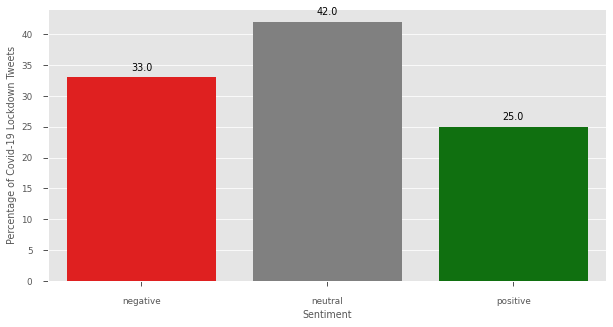

In [27]:
# Visualise percentage of posts with each sentiment

#### Plot settings ####
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_context('paper')

cols = ['red' if label == 'negative' else ('green' if label == 'positive' else 'gray') for label in tweets_per_sentiment['sentiment_label']]
ax = sns.barplot(x="sentiment_label",
                 y="percentage_of_total",
                 data=tweets_per_sentiment,
                 palette=cols
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel='Sentiment', ylabel='Percentage of Covid-19 Lockdown Tweets')

plt.savefig('../Twitter_Output/Twitter_Jan_Mar_SentimentChart.png', dpi=400, bbox_inches="tight")

In [28]:
# Word Cloud Function

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, category):
    comment_words = ''
    processed_text = dataframe['processed_text']
    
    # iterate through list
    for tweet_text in processed_text:
        # split the text into tokens
        tokens = tweet_text.split()
        # Append tokens to string comment_words
        comment_words += " ".join(tokens)+" "

    # make a word cloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='rainbow',
                    #stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the word cloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    wordcloud.to_file(f'../Twitter_Output/Twitter_Jan_Mar_Wordcloud_{category}.png')

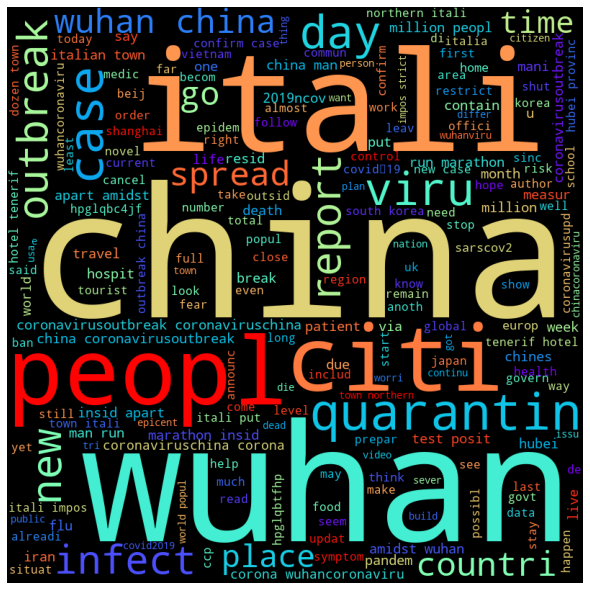

In [29]:
# All Sentiment Word Cloud

generate_word_cloud(tweets, 'all')

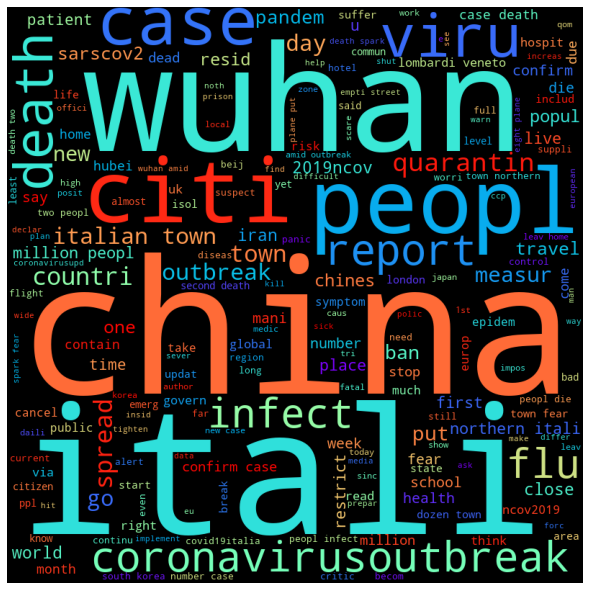

In [30]:
# Negative Sentiment DataFrame

negative = tweets[tweets['sentiment_label'] == 'negative']
generate_word_cloud(negative, 'negative')

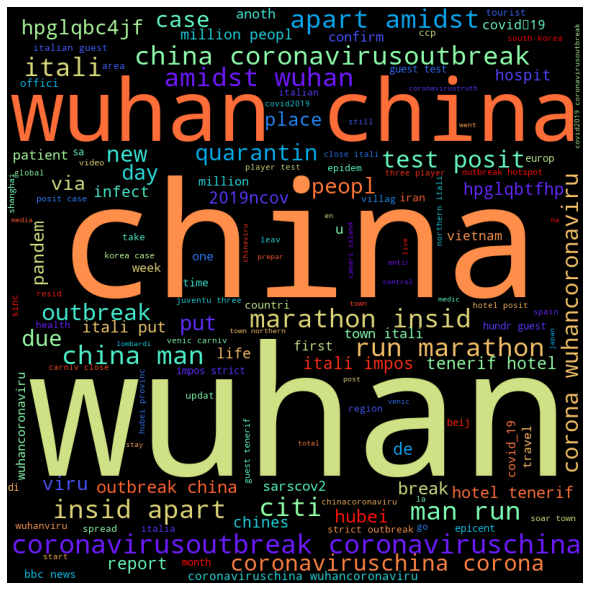

In [31]:
# Neutral Sentiment DataFrame

neutral = tweets[tweets['sentiment_label'] == 'neutral']
generate_word_cloud(neutral, 'neutral')

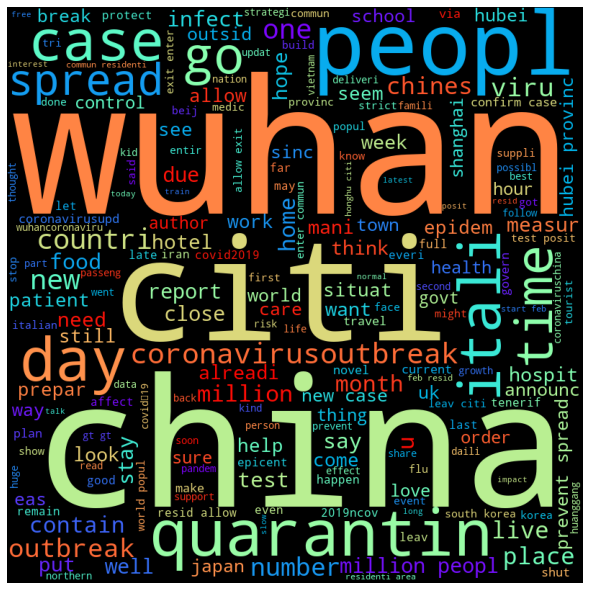

In [32]:
# Positive Sentiment DataFrame

positive = tweets[tweets['sentiment_label'] == 'positive']
generate_word_cloud(positive, 'positive')

In [33]:
# Export to a CSV

# path = "./Twitter_Sentiments/"
# if not os.path.exists(path):
#         os.makedirs(path)

tweets.to_csv('./Twitter_Jan_Mar_Sentiments.csv') 

In [34]:
# Check

text = tweets['Text']
for t in text:
    if 'china' in t:
        print(t)
        print("======================================================================================================")

A must-watch! Comprehensive 30-minute documentary of #Wuhan, one month after its lockdown over the #coronavirus outbreak. #covid19 #china
Has china really controlled #coronavirus ?

if they have, they only did it by lockdown &amp; Extreme quarantine methods.

We must expect the numbers to grow exponentially just as it did there.

It becomes a big problem when there are no more  beds.

#COVID19
So what are the most streamed/watched movies &amp; drama in Wuhan &amp; Hubei after the lockdown? #coronaviruschina @HuXijin_GT @CGTNOfficial @XHNews @XinhuaChinese #Covid_19 #COVID19
老外说起他疫情中的感想很是激动.#Wuhan #China #武汉加油  #中国加油 
Listen to this man and see what's like to live in China during a #coronavirus lockdown of the city. @bbcchinese @SkyNews @PDChina @CGTNOfficial @ChinaDaily @Echinanews @XinhuaChinese @SCMPNews @CNzhisheng #COVID19 https://t.co/xygF5rrfby
A police checkpoint in Lombardy, Italy. A number of cities are on lockdown because of COVID19
#COVID19 #Coronavirus #COVID #COVID19 #Chin